 ## UK Road Safety: Traffic Accidents and Vehicles Machine Learning
 
 The goal of this project is the investigate what causes Serious and Fatal accidents in hopes of preventing and decreasing the number of them. The dataset consists of accident records from the UK over the course of 15+ years. I hope to show the causes of these accidents through visualizations and create an algorithm that can predict the severity of accidents. 
 
The UK government collects and publishes (usually on an annual basis) detailed information about traffic accidents across the country. This information includes, but is not limited to, geographical locations, weather conditions, type of vehicles, number of casualties and vehicle manoeuvres, making this a very interesting and comprehensive dataset for analysis and research.

The data that I'm using is compiled and available through [Kaggle](https://www.kaggle.com/tsiaras/uk-road-safety-accidents-and-vehicles) and in a less compliled form, [here](https://beta.ukdataservice.ac.uk/datacatalogue/series/series?id=2000045). 

Genesis L. Taylor<br>
[Github](https://github.com/GenTaylor/) | [Linkedin](https://linkedin.com/in/genesistaylor/) | [Tableau](https://public.tableau.com/profile/genesis.taylor#!/) | [genesisltaylor@gmail.com](mailto:genesisltaylor@gmail.com)


Problem: Traffic Accidents<br>
Solution Method: Use data to figure out how to lower the number of accidents and the severity of them.

### Table of Contents
* [Machine Learning](#Machine-Learning)<br>
    * [Preprocessing](#Preprocessing)<br>
    * [Imbalanced Data](#Imbalanced-Data)<br>
    * [Resample: Undersampling](#Resample:-Undersampling)<br>
    * [Unsupervised Learning](#Unsupervised-Learning)<br>
    * [Supervised Learning with Resampling as Undersampling](#Supervised-Learning-with-Resampling-as-Undersampling)<br>
    * [Supervised Learning Results](#Supervised-Learning-Results)<br>

### Links to Other Notebooks And Presentation
__[UK Road Safety: Traffic Accidents and Vehicles Introduction, Data Cleaning, and Feature Manipulation](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Data_Cleaning_and_Feature_Manipulation.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Introduction, Data Cleaning, and Feature Manipulation: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Data_Cleaning_and_Feature_Manipulation.ipynb)__<br>
<br>

__[UK Road Safety: Traffic Accidents and Vehicles Visualizations and Solution](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Visualizations_and_Solution.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Visualizations and Solution: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Visualizations_and_Solution.ipynb)__<br>
<br>
__[UK Road Safety: Traffic Accidents and Vehicles Machine Learning](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Machine_Learning.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Machine Learning: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Machine_Learning.ipynb)__<br>
<br>
__[Traffic Analysis and Severity Prediction Powerpoint Presentation]("Traffic_Analysis_and_Severity_Prediction.pptx")__<br>
__[Traffic Analysis and Severity Prediction Powerpoint Presentation: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/Traffic_Analysis_and_Severity_Prediction.pptx)__<br>

### Importing and Data Merging

In [1]:
#Import modules
import numpy as np
import holidays
import pandas as pd
import seaborn as sns
import pickle
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

#for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

#other learners
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from kmodes.kmodes import KModes

#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

#webscraping
import requests
from bs4 import BeautifulSoup
import re
import urllib
from IPython.core.display import HTML

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


#warning ignorer
import warnings
warnings.filterwarnings("ignore")

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
Using TensorFlow backend.


In [2]:
# # #DATAFRAME PICKLE CREATED IN CELLS BELOW INSTEAD OF RUNNING THROUGH ENTIRE PROCESS AFTER RESTARTING
# # #import pickled file
df = pd.read_pickle("df.pkl")
# df.to_csv('uktraffic_acc.csv') 

## Machine Learning

In [4]:
#made separate dataframe w. set index that wouldnt effect data vis above
df1=df
#set index to accident_index
df1.set_index('accident_index', inplace=True)
df1.head()

1st_road_class 1st_road_number 2nd_road_number  \
accident_index                                                  
201001BS70003               B             302               0   
201001BS70004               A             402            4204   
201001BS70007    Unclassified               0               0   
201001BS70007    Unclassified               0               0   
201001BS70008               A            3217            3220   

               accident_severity carriageway_hazards       date day_of_week  \
accident_index                                                                
201001BS70003             Slight                None 2010-01-11      Monday   
201001BS70004             Slight                None 2010-01-11      Monday   
201001BS70007             Slight                None 2010-01-02    Saturday   
201001BS70007             Slight                None 2010-01-02    Saturday   
201001BS70008             Slight                None 2010-01-04      Monday   

               did_police_officer_attend_scene_of_accident  \
accident_index                                               
201001BS70003                                            1   
201001BS70004                                            1   
201001BS70007                                            1   
201001BS70007                                            1   
201001BS70008                                            1   

                        junction_control          junction_detail  ...  \
accident_index                                                     ...   
201001BS70003   Give way or uncontrolled  T or staggered junction  ...   
201001BS70004        Auto traffic signal  T or staggered junction  ...   
201001BS70007   Give way or uncontrolled          Mini-roundabout  ...   
201001BS70007   Give way or uncontrolled          Mini-roundabout  ...   
201001BS70008        Auto traffic signal               Crossroads  ...   

                 vehicle_type was_vehicle_left_hand_drive  \
accident_index                                              
201001BS70003   Goods Vehicle                          No   
201001BS70004             Car                          No   
201001BS70007             Car                          No   
201001BS70007             Car                          No   
201001BS70008             Car                          No   

               x1st_point_of_impact month  weekend hour time_of_day  season  \
accident_index                                                                
201001BS70003                 Front     1        0    7           1  winter   
201001BS70004                 Front     1        0   18           6  winter   
201001BS70007              Nearside     1        1   21           6  winter   
201001BS70007                 Front     1        1   21           6  winter   
201001BS70008              Nearside     1        0   20           6  winter   

               engine_capacity_cc_size accident_seriousness  
accident_index                                               
201001BS70003          small engine cc          Not Serious  
201001BS70004         medium engine cc          Not Serious  
201001BS70007         medium engine cc          Not Serious  
201001BS70007          small engine cc          Not Serious  
201001BS70008         medium engine cc          Not Serious  

[5 rows x 59 columns]

In [5]:
df1 = df1.drop(['accident_severity'],axis=1)

In [6]:
df1.head()

1st_road_class 1st_road_number 2nd_road_number  \
accident_index                                                  
201001BS70003               B             302               0   
201001BS70004               A             402            4204   
201001BS70007    Unclassified               0               0   
201001BS70007    Unclassified               0               0   
201001BS70008               A            3217            3220   

               carriageway_hazards       date day_of_week  \
accident_index                                              
201001BS70003                 None 2010-01-11      Monday   
201001BS70004                 None 2010-01-11      Monday   
201001BS70007                 None 2010-01-02    Saturday   
201001BS70007                 None 2010-01-02    Saturday   
201001BS70008                 None 2010-01-04      Monday   

               did_police_officer_attend_scene_of_accident  \
accident_index                                               
201001BS70003                                            1   
201001BS70004                                            1   
201001BS70007                                            1   
201001BS70007                                            1   
201001BS70008                                            1   

                        junction_control          junction_detail   latitude  \
accident_index                                                                 
201001BS70003   Give way or uncontrolled  T or staggered junction  51.484087   
201001BS70004        Auto traffic signal  T or staggered junction  51.509212   
201001BS70007   Give way or uncontrolled          Mini-roundabout  51.513314   
201001BS70007   Give way or uncontrolled          Mini-roundabout  51.513314   
201001BS70008        Auto traffic signal               Crossroads  51.484361   

                ...   vehicle_type was_vehicle_left_hand_drive  \
accident_index  ...                                              
201001BS70003   ...  Goods Vehicle                          No   
201001BS70004   ...            Car                          No   
201001BS70007   ...            Car                          No   
201001BS70007   ...            Car                          No   
201001BS70008   ...            Car                          No   

               x1st_point_of_impact  month weekend hour time_of_day  season  \
accident_index                                                                
201001BS70003                 Front      1       0    7           1  winter   
201001BS70004                 Front      1       0   18           6  winter   
201001BS70007              Nearside      1       1   21           6  winter   
201001BS70007                 Front      1       1   21           6  winter   
201001BS70008              Nearside      1       0   20           6  winter   

               engine_capacity_cc_size accident_seriousness  
accident_index                                               
201001BS70003          small engine cc          Not Serious  
201001BS70004         medium engine cc          Not Serious  
201001BS70007         medium engine cc          Not Serious  
201001BS70007          small engine cc          Not Serious  
201001BS70008         medium engine cc          Not Serious  

[5 rows x 58 columns]

In [7]:
print(df1.columns)

Index(['1st_road_class', '1st_road_number', '2nd_road_number',
       'carriageway_hazards', 'date', 'day_of_week',
       'did_police_officer_attend_scene_of_accident', 'junction_control',
       'junction_detail', 'latitude', 'light_conditions',
       'local_authority_district', 'local_authority_highway', 'longitude',
       'lsoa_of_accident_location', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year', 'inscotland', 'age_band_of_driver', 'age_of_vehicle',
       'driver_home_area_type', 'driver_imd_decile', 'engine_capacity_cc',
       'hit_object_in_carriageway', 'hit_object_off_carriageway',
       'journey_purpose_of_driver', 'junction_location', 'make', 'model',
       'propulsion_code', 'sex_of_driver', 'skidd

### Preprocessing

In [8]:
#separate dtypes
notif=df1.select_dtypes(exclude=['int','float','int64'])
intfldtypes = df1.select_dtypes(include=['int','float','int64'])
print('Objects',notif.columns)
print("\nNonObjects",intfldtypes.columns)

#checking to make sure all are accounted for
print(df1.shape)
print(notif.shape)
print(intfldtypes.shape)

Objects Index(['1st_road_class', '1st_road_number', '2nd_road_number',
       'carriageway_hazards', 'date', 'day_of_week',
       'did_police_officer_attend_scene_of_accident', 'junction_control',
       'junction_detail', 'light_conditions', 'local_authority_district',
       'local_authority_highway', 'lsoa_of_accident_location',
       'number_of_casualties', 'number_of_vehicles',
       'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland',
       'age_band_of_driver', 'age_of_vehicle', 'driver_home_area_type',
       'hit_object_in_carriageway', 'hit_object_off_carriageway',
       'journey_purpose_of_driver', 'junction_location', 'make', 'model',
       'propulsion_code', 'sex_of_driver', 'skidding_and_overturning',
       'towing_and_articulation', 'vehicle_leaving_carriageway',
   

Label Encoder was used instead of OneHotEncoder due to the memory errors One Hot Encoder caused in the data. The algorithms used will be classifiers, through boosting and trees, and not linear. 

In [9]:
#label encode objects
obj_le= notif.apply(LabelEncoder().fit_transform)
#re-add with non-objects
df_ml= pd.concat([obj_le,intfldtypes], axis=1, sort=False)
#check shape
print(df_ml.shape)

(561135, 58)


In [10]:
#Set up of X and Y
X= df_ml.drop(['accident_seriousness'],axis=1)
y= df_ml['accident_seriousness']

In [11]:
df_ml.accident_seriousness.value_counts()

0    492804
1     68331
Name: accident_seriousness, dtype: int64

In [12]:
df.dtypes

1st_road_class                                         object
1st_road_number                                        object
2nd_road_number                                        object
accident_severity                                      object
carriageway_hazards                                    object
date                                           datetime64[ns]
day_of_week                                            object
did_police_officer_attend_scene_of_accident            object
junction_control                                       object
junction_detail                                        object
latitude                                              float64
light_conditions                                       object
local_authority_district                               object
local_authority_highway                                object
longitude                                             float64
lsoa_of_accident_location                              object
number_o

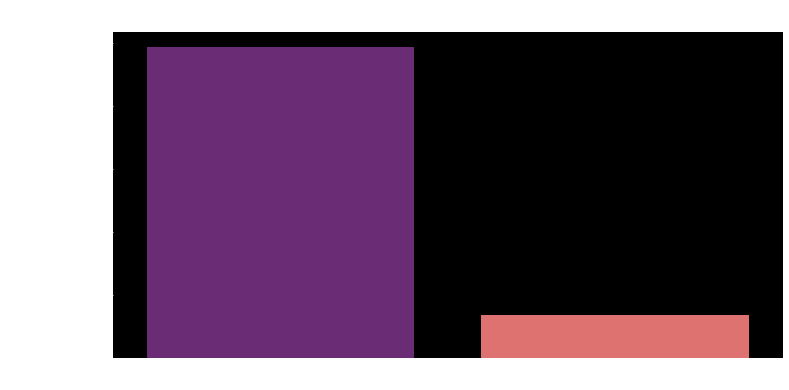

In [13]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="accident_seriousness", palette="magma", data=df)

plt.style.use('dark_background')
plt.title("Accident Seriousness",fontsize=25,fontweight="bold")
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents\n", fontsize=15, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('accident_seriousness.png')
plt.show()

### Imbalanced Data
The data in this dataset is extremely imbalanced for what we are trying to predict. We are going to resample the data as undersampling, where we reduce the number of majority (Not Serious Accidents) samples.<br><br> 
***
The machine learning classifier algorithms that we are going to use are as follows:
* Bagging Classifier (sklearn)
* AdaBoost Classifier (sklearn)
* Random Forest Classifier (sklearn)
* Gradient Boosting Classifier (sklearn)*
* LightGBM Classifier (LightGBM)
* XGBoost Classifier (xgboost)
* Balanced Bagging Classifier(imblearn)
* Balanced Random Forest Classifier (imblearn) 
* Easy Ensemble Classifier (imblearn)<br><br>
***
*Gradient Boosting was commented out because of the time it took to run (18hrs) and not having relevant enough results to still consider.

### Resample: Undersampling

In [14]:
# setting up testing and training sets
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y, 
                                                                    test_size=0.25, random_state=27)

In [15]:
# concatenate our training data back together
res_X = pd.concat([res_X_train, res_y_train], axis=1)

In [16]:
# separate minority and majority classes
not_severe = res_X[res_X.accident_seriousness==0]
severe = res_X[res_X.accident_seriousness==1]

In [17]:
# decrease majority
not_severe_decreased = resample(not_severe,
                          replace=True, # sample with replacement
                          n_samples=len(severe), # match number in majority class
                          random_state=27) # reproducible results

In [18]:
# combine majority and severe_increased minority
newdf = pd.concat([severe, not_severe_decreased])

In [19]:
newdf.accident_seriousness.value_counts()

1    51357
0    51357
Name: accident_seriousness, dtype: int64

In [20]:
res_X_train = newdf.drop('accident_seriousness', axis=1)
res_y_train = newdf.accident_seriousness

### Unsupervised Learning
Before, we get in to predictions, we are going to complete some machine learning in ordered to see how the data relates to each other.
We are going to do this on the resampled data as well, in order to avoid bias. We will use two clusters which, in theory, represent the two variables for accident_seriousness, Not Serious & Serious

In [39]:
# "clustering" using kmode algorithm that is designed to handle mixed data
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1)
fitClusters_huang = km_huang.fit_predict(newdf)
fitClusters_huang

array([1, 0, 1, ..., 1, 1, 1], dtype=uint16)

In [40]:
newdf1 = newdf.copy().reset_index()
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([newdf1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

In [41]:
combinedDf.head()

accident_index  1st_road_class  1st_road_number  2nd_road_number  \
0  201554A415715  0               429              0                 
1  2010440174154  0               27               2391              
2  201506N097860  5               0                0                 
3  2016460101917  0               252              251               
4  201342I085803  0               120              0                 

   carriageway_hazards  date  day_of_week  \
0  1                    2148  4             
1  1                    119   0             
2  1                    1880  5             
3  1                    2426  5             
4  1                    1182  4             

   did_police_officer_attend_scene_of_accident  junction_control  \
0  0                                            2                  
1  0                                            2                  
2  0                                            2                  
3  0                                            2                  
4  0                                            2                  

   junction_detail  ...  longitude  speed_limit  year  driver_imd_decile  \
0  8                ... -2.110741   30.0         2015  8.0                 
1  6                ... -1.319297   30.0         2010  5.0                 
2  8                ... -2.295013   30.0         2015  8.0                 
3  6                ...  0.878850   40.0         2016  8.0                 
4  8                ...  0.674514   60.0         2013  9.0                 

   engine_capacity_cc  month  weekend  hour  accident_seriousness  \
0  1299.0              11     0        6     1                      
1  1997.0              4      1        0     1                      
2  2143.0              2      0        12    1                      
3  1560.0              8      0        18    1                      
4  1149.0              3      0        19    1                      

   cluster_predicted  
0  1                  
1  0                  
2  1                  
3  0                  
4  0                  

[5 rows x 60 columns]

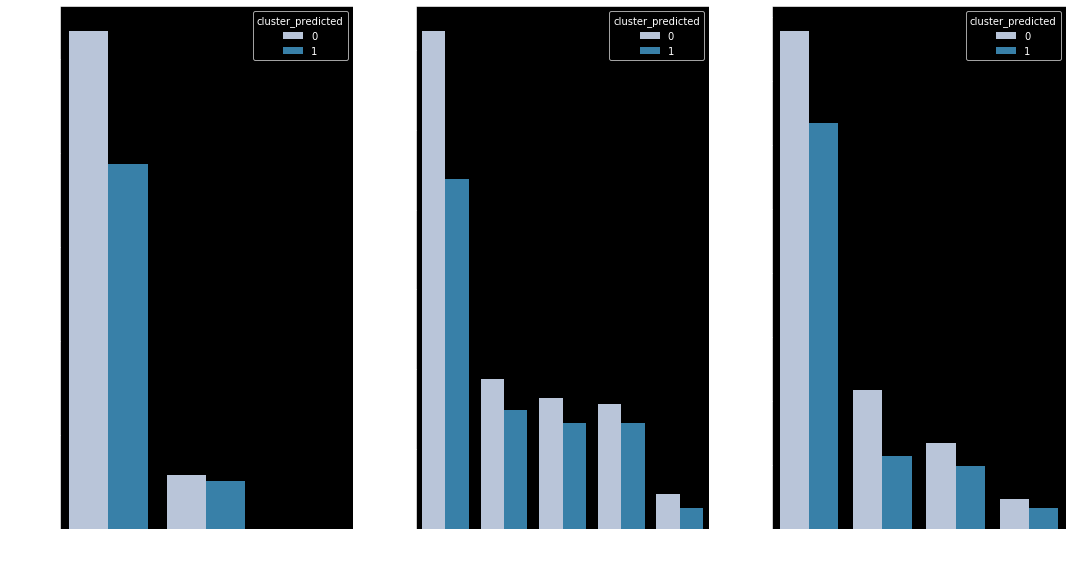

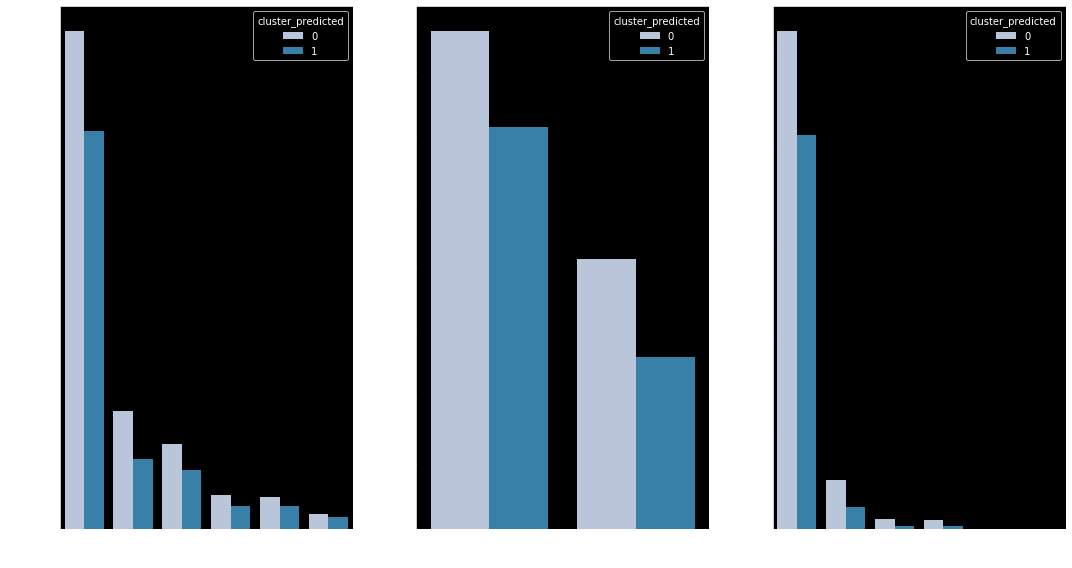

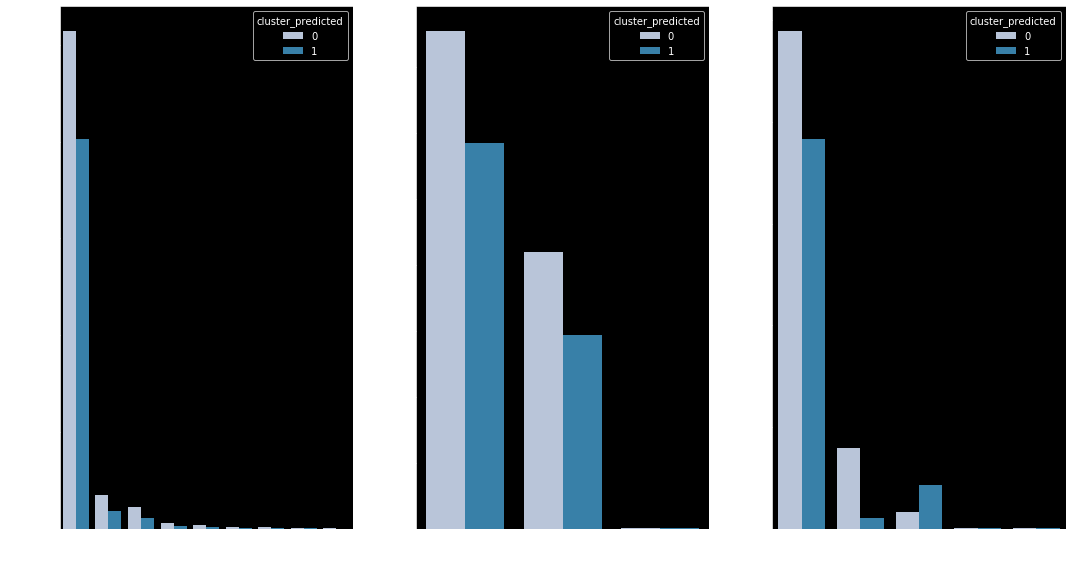

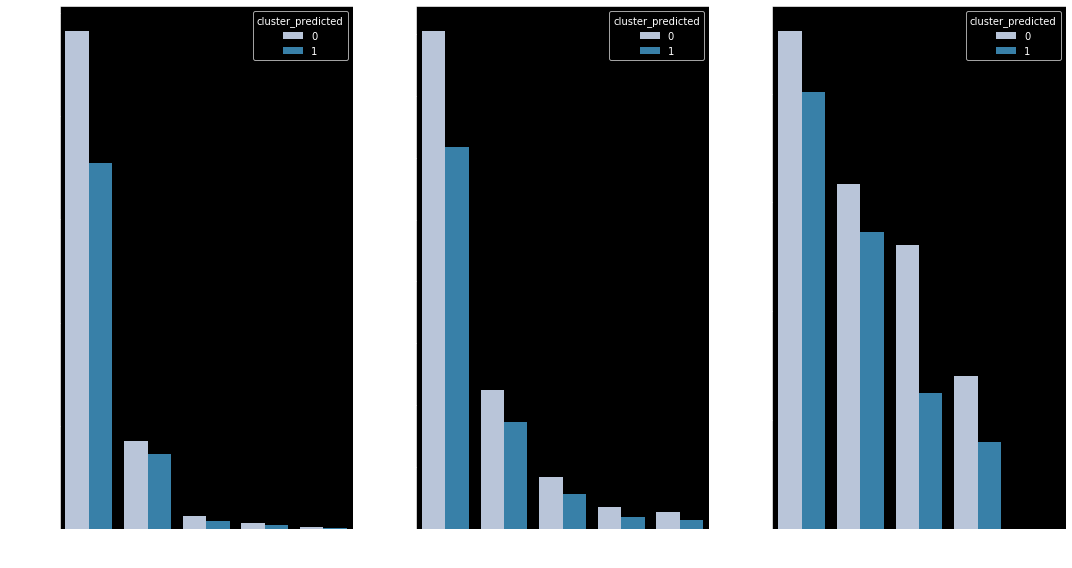

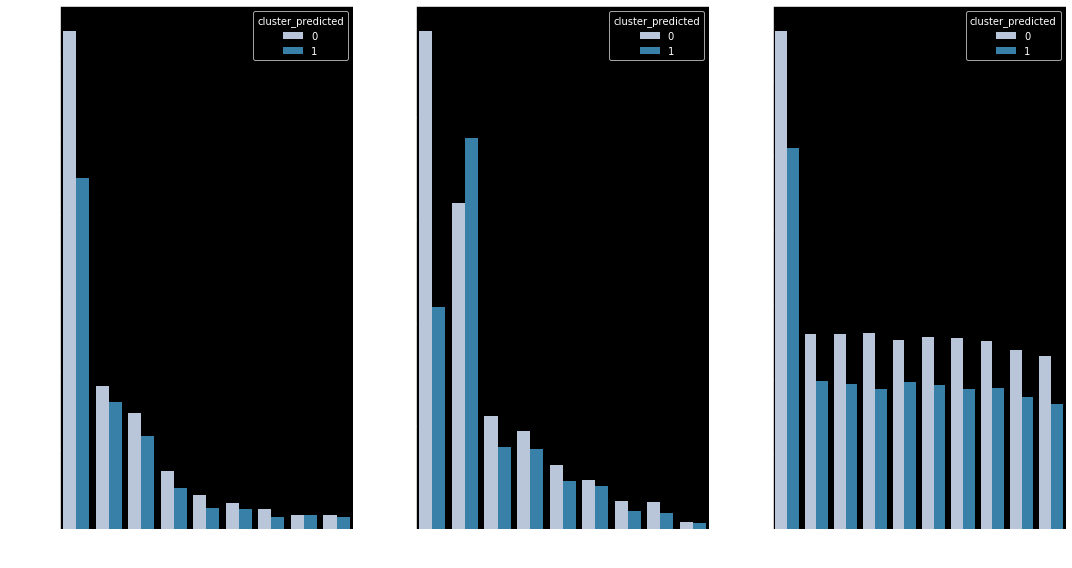

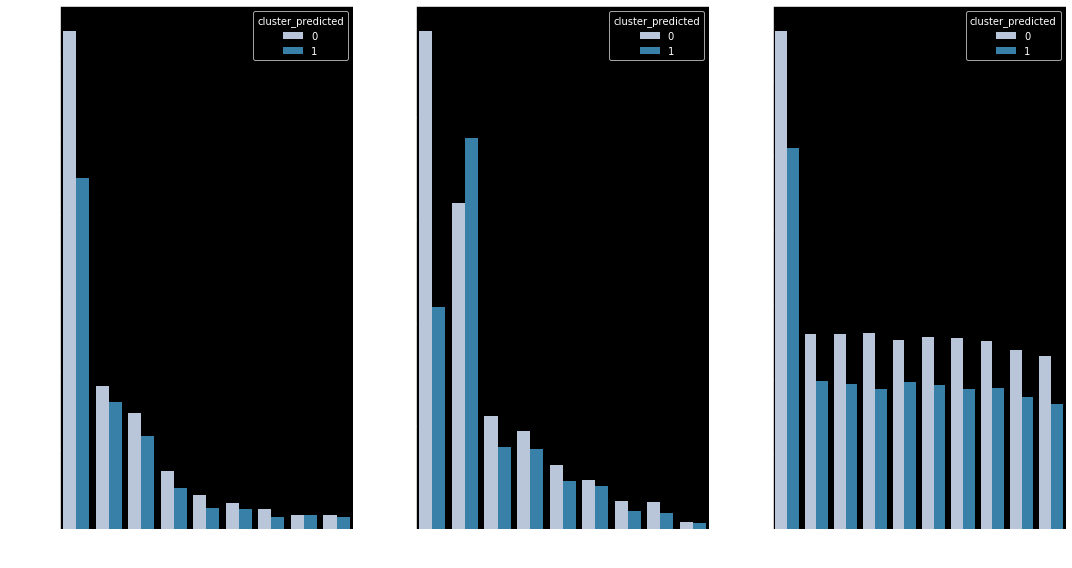

In [44]:
#plotting a few of these features just to see how they relate to the clustering for seriousness
f, axs = plt.subplots(1,3,figsize = (15,8))
sns.countplot(x=combinedDf['did_police_officer_attend_scene_of_accident'],
              order=combinedDf['did_police_officer_attend_scene_of_accident'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])

sns.countplot(x=combinedDf['x1st_point_of_impact'],
              order=combinedDf['x1st_point_of_impact'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])

sns.countplot(x=combinedDf['number_of_vehicles'],
              order=combinedDf['number_of_vehicles'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot1.png')
plt.show()


f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['speed_limit'],
              order=combinedDf['speed_limit'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['urban_or_rural_area'],
              order=combinedDf['urban_or_rural_area'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['skidding_and_overturning'],
              order=combinedDf['skidding_and_overturning'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot2.png')
plt.show()



f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['vehicle_leaving_carriageway'],
              order=combinedDf['vehicle_leaving_carriageway'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['sex_of_driver'],
              order=combinedDf['sex_of_driver'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['vehicle_type'],
              order=combinedDf['vehicle_type'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot3.png')
plt.show()


f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['junction_control'],
              order=combinedDf['junction_control'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['number_of_casualties'],
              order=combinedDf['number_of_casualties'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['age_band_of_driver'],
              order=combinedDf['age_band_of_driver'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot4.png')
plt.show()



f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['junction_detail'],
              order=combinedDf['junction_detail'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['junction_location'],
              order=combinedDf['junction_location'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['driver_imd_decile'],
              order=combinedDf['driver_imd_decile'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot5.png')
plt.show()


f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['junction_detail'],
              order=combinedDf['junction_detail'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['junction_location'],
              order=combinedDf['junction_location'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['driver_imd_decile'],
              order=combinedDf['driver_imd_decile'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot6.png')
plt.show()

Looking at these graphs we can see the patterns of how each category of eacch column pairs off with the clustering on accident_seriousness.

### Supervised Learning with Resampling as Undersampling

In [49]:
#confusion matrix plot function
def cm_plot(var):
    plt.figure(figsize=(15,5))
    plt.style.use('dark_background')
    plt.clf()
    plt.imshow(var, interpolation='nearest', cmap='tab20')
    classNames = ['No Loyalty','Loyalty']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual\n')
    plt.xlabel('Predicted\n')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+"="+str(var[i][j]),horizontalalignment='center', 
                     color='black')
    plt.show()

#### Method 1
First, we are going to run some standard classifier algorithms using the resampling method from above, gather the results of some scoring metrics (Accuracy, Log Loss, Cross Validation, Recall, Roc Auc, F1, False Positive Rate, Error Rate), and put those scores into a dataframe





BaggingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.9727%
Cross validation scores: 0.6871312576669197
Log Loss: 0.6157355650730744


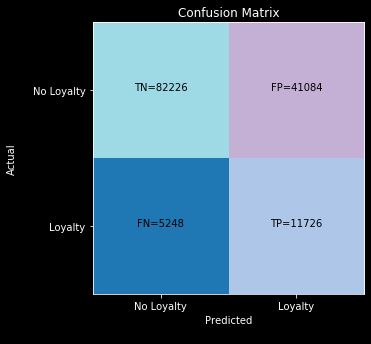





AdaBoostClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.7446%
Cross validation scores: 0.6572911190295384
Log Loss: 0.6880453803827911


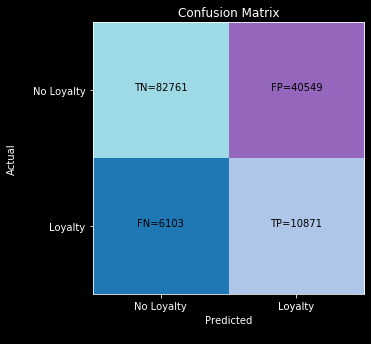





RandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 67.0882%
Cross validation scores: 0.6884942656307805
Log Loss: 0.6123101302134623


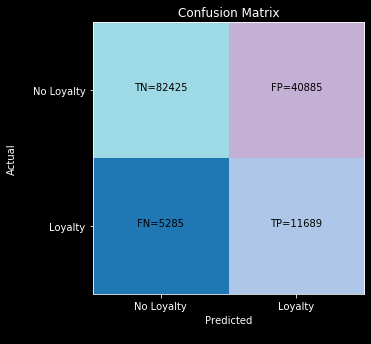





LGBMClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 67.8124%
Cross validation scores: 0.6796833927215374
Log Loss: 0.596513578691033


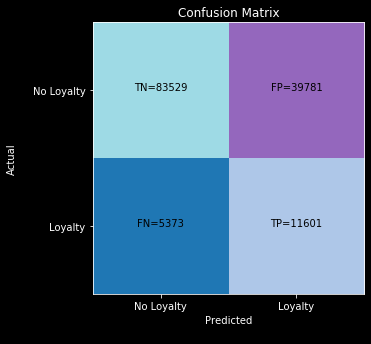





XGBClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.7995%
Cross validation scores: 0.6879295909028954
Log Loss: 0.6577360727445484


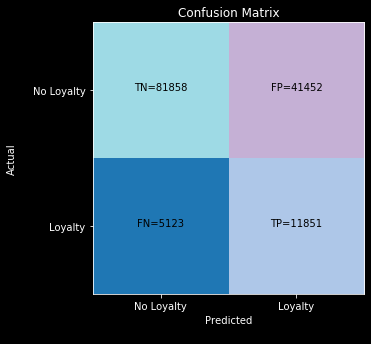

****************************************


In [50]:
#Try modeling using  different classification models
classifiers = [
    BaggingClassifier(max_features=X.shape[1], n_estimators=500, random_state=42),
    AdaBoostClassifier( n_estimators=500, learning_rate=0.05, random_state=42),
    RandomForestClassifier(criterion='entropy', max_depth=40,max_features=X.shape[1], 
                           min_samples_split=8, n_estimators=500, random_state=42),
    LGBMClassifier(learning_rate =0.03, max_depth=40, min_data_in_leaf=10,
                   n_estimators=500, num_leaves=50, random_state = 42),
    XGBClassifier(learning_rate=0.05, n_estimators=500, subsample= 1,random_state = 42,
                        gamma = 1, max_depth=40)]
    
    


#putting results in df
res_cols=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results = pd.DataFrame(columns=res_cols)

for clf in classifiers:
    clf.fit(res_X_train, res_y_train)
    name = clf.__class__.__name__
    
    print("\n"*3)
    print(name,"Results:")
       
    print('~'*40)
    y_pred = clf.predict(res_X_test)
    acc = accuracy_score(res_y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    cv= np.mean(cross_val_score(clf, res_X_train, res_y_train, cv=3))
    print("Cross validation scores:",cv)
    
    
    train_predictions = clf.predict_proba(res_X_test)
    logloss = log_loss(res_y_test, train_predictions)
    print("Log Loss: {}".format(logloss))
    
    cm = confusion_matrix(res_y_test, y_pred)
    
    cm_plot(cm)
    
    #FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(res_y_test,y_pred).ravel()
    
    fpr = fp/(tn+fp)
    ers = 1-acc
    rec= recall_score(res_y_test, y_pred)
    roc=roc_auc_score(res_y_test, y_pred)
    f1s=f1_score(res_y_test, y_pred)
    results_final = pd.DataFrame([[name, round(acc*100,3), round(logloss,3), 
                                   round(cv*100,3), round(rec*100,3), round(roc*100,3),
                                   round(f1s*100,3),round(fpr*100,3),round(ers*100,3)]],
                                 columns=res_cols)
    results = results.append(results_final)
    
print("*"*40)

In [51]:
print("Results Shape",results.shape)
results.head(10)

Results Shape (5, 9)


Classifier  Accuracy  Log Loss  Cross Val  Recall  Roc Auc  \
0       BaggingClassifier    66.973     0.616     68.713  69.082   67.882   
0      AdaBoostClassifier    66.745     0.688     65.729  64.045   65.581   
0  RandomForestClassifier    67.088     0.612     68.849  68.864   67.854   
0          LGBMClassifier    67.812     0.597     67.968  68.346   68.042   
0           XGBClassifier    66.799     0.658     68.793  69.819   68.101   

       F1  False Positive Rate  Error Rate  
0  33.607               33.318      33.027  
0  31.789               32.884      33.255  
0  33.614               33.156      32.912  
0  33.943               32.261      32.188  
0  33.727               33.616      33.201

#### Method 2
For the following Balanced algorithms from imblearn we will be using the standard testing and training sets (X_train, X_test, y_train, y_test) and will allow the algorithms to do the resampling.<br> <br>For the sampling_strategy, we will be using majority as the solution.<br><br>'majority': resample only the majority class

We will then gather the results of some scoring metrics (Accuracy, Log Loss, Cross Validation, Recall, Roc Auc, F1, False Positive Rate, Error Rate), and put those scores into a dataframe.

In [52]:
#train_tes_split without resampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)





BalancedBaggingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 78.5321%
Cross validation scores: 0.7835718595519356
Log Loss: 0.5083639622989169


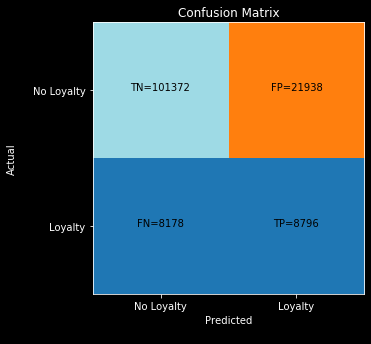





EasyEnsembleClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.6092%
Cross validation scores: 0.6677565267506275
Log Loss: 0.6897912318334272


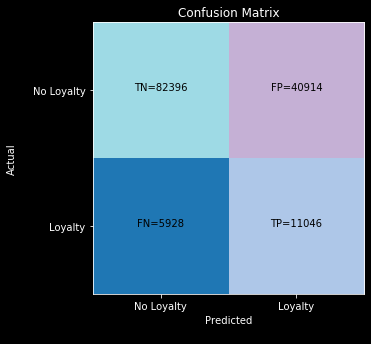





BalancedRandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 67.2785%
Cross validation scores: 0.6711282603625109
Log Loss: 0.6076769094064609


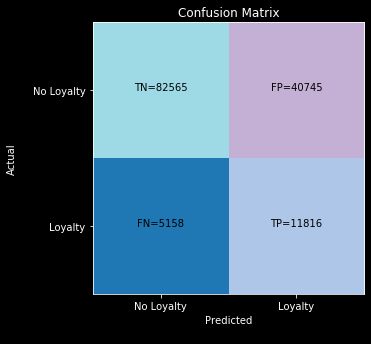

****************************************


In [53]:
#Try modeling using  different classification models
classifiers2 = [
    BalancedBaggingClassifier(max_features=X.shape[1], n_estimators=500, replacement=True,
                              sampling_strategy='majority', random_state=42),
    EasyEnsembleClassifier(n_estimators=500, random_state=42, replacement=True,
                           sampling_strategy='majority'),
    BalancedRandomForestClassifier(criterion='entropy', max_depth=40,min_samples_leaf = 1, 
                                   max_features=X.shape[1], sampling_strategy='majority', 
                                   replacement=True, min_samples_split=8, n_estimators=500,
                                   random_state=42)]

#putting results in df
res_cols2=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results2 = pd.DataFrame(columns=res_cols2)

for clf2 in classifiers2:
    clf2.fit(X_train, y_train)
    name2 = clf2.__class__.__name__
    
    print("\n"*3)
    print(name2,"Results:")
       
    print('~'*40)
    y_pred2 = clf2.predict(X_test)
    acc2 = accuracy_score(y_test, y_pred2)
    print("Accuracy: {:.4%}".format(acc2))
    
    cv2= np.mean(cross_val_score(clf2, X_train, y_train, cv=3))
    print("Cross validation scores:",cv2)
    
    
    train_predictions2 = clf2.predict_proba(X_test)
    logloss2 = log_loss(y_test, train_predictions2)
    print("Log Loss: {}".format(logloss2))
    
    cm2 = confusion_matrix(y_test, y_pred2)
    
    cm_plot(cm2)
    
    #FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred2).ravel()
    
    fpr2 = fp/(tn+fp)
    ers2 = 1-acc
    rec2= recall_score(y_test, y_pred2)
    roc2=roc_auc_score(y_test, y_pred2)
    f1s2=f1_score(y_test, y_pred2)
    results_final2 = pd.DataFrame([[name2, round(acc2*100,3), round(logloss2,3), 
                                   round(cv2*100,3), round(rec2*100,3), round(roc2*100,3),
                                   round(f1s2*100,3),round(fpr2*100,3),round(ers2*100,3)]],
                                 columns=res_cols2)
    results2 = results2.append(results_final2)
    
print("*"*40)

In [54]:
print("Results 2 Shape",results2.shape)
results2.head(10)

Results 2 Shape (3, 9)


Classifier  Accuracy  Log Loss  Cross Val  Recall  \
0       BalancedBaggingClassifier    78.532     0.508     78.357  51.820   
0          EasyEnsembleClassifier    66.609     0.690     66.776  65.076   
0  BalancedRandomForestClassifier    67.279     0.608     67.113  69.612   

   Roc Auc      F1  False Positive Rate  Error Rate  
0   67.015  36.874               17.791      33.201  
0   65.948  32.048               33.180      33.201  
0   68.285  33.986               33.043      33.201

We will now combine the dataframes from both methods into one datframe for analyzing and visualizations

In [57]:
ml_results = pd.concat([results,results2])
print("Shape",ml_results.shape)
ml_results.head(10)

Shape (8, 9)


Classifier  Accuracy  Log Loss  Cross Val  Recall  \
0               BaggingClassifier    66.973     0.616     68.713  69.082   
0              AdaBoostClassifier    66.745     0.688     65.729  64.045   
0          RandomForestClassifier    67.088     0.612     68.849  68.864   
0                  LGBMClassifier    67.812     0.597     67.968  68.346   
0                   XGBClassifier    66.799     0.658     68.793  69.819   
0       BalancedBaggingClassifier    78.532     0.508     78.357  51.820   
0          EasyEnsembleClassifier    66.609     0.690     66.776  65.076   
0  BalancedRandomForestClassifier    67.279     0.608     67.113  69.612   

   Roc Auc      F1  False Positive Rate  Error Rate  
0   67.882  33.607               33.318      33.027  
0   65.581  31.789               32.884      33.255  
0   67.854  33.614               33.156      32.912  
0   68.042  33.943               32.261      32.188  
0   68.101  33.727               33.616      33.201  
0   67.015  36.874               17.791      33.201  
0   65.948  32.048               33.180      33.201  
0   68.285  33.986               33.043      33.201

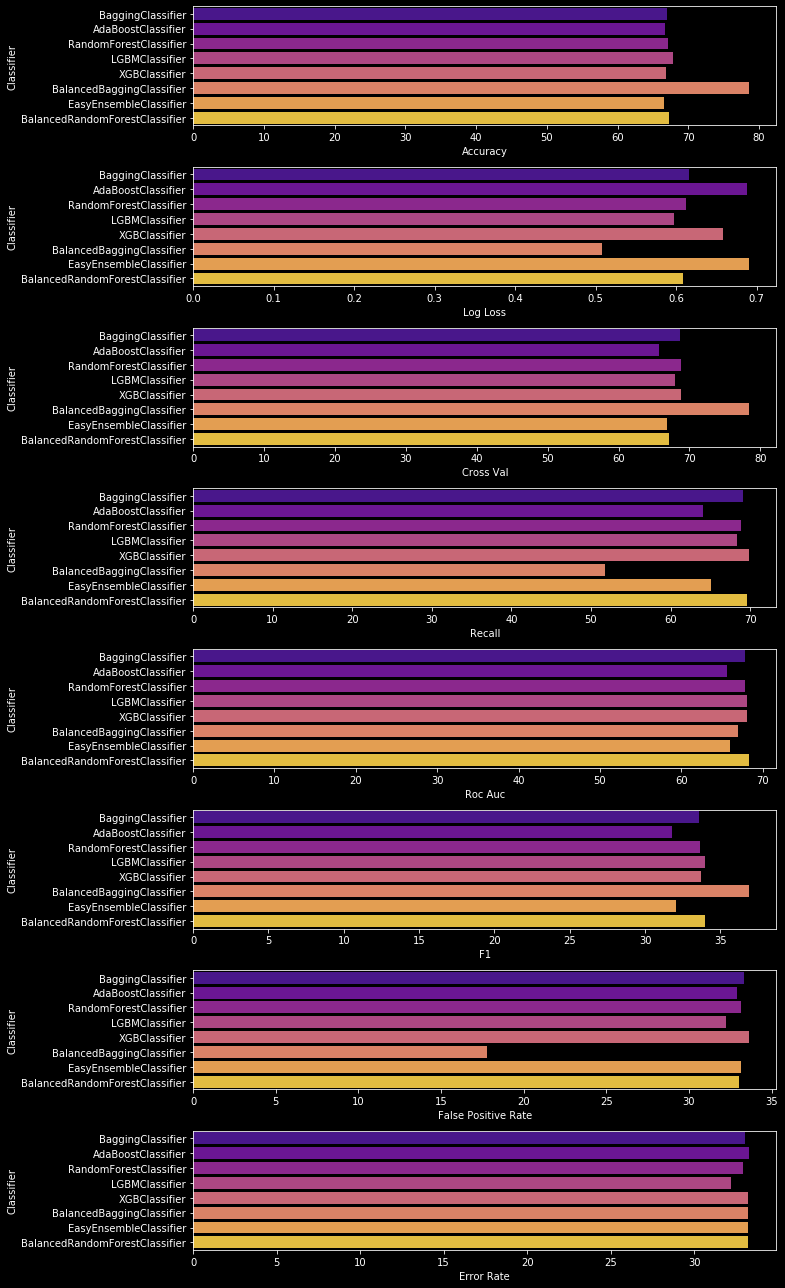

In [75]:
#Visualize scores for all model

fig, ax =plt.subplots(nrows=8, ncols=1, figsize = (11,18))
sns.barplot(x='Accuracy', y='Classifier', data=ml_results, palette='plasma', ax=ax[0])
sns.barplot(x='Log Loss', y='Classifier', data=ml_results, palette='plasma', ax=ax[1])
sns.barplot(x='Cross Val', y='Classifier', data=ml_results, palette='plasma', ax=ax[2])
sns.barplot(x='Recall', y='Classifier', data=ml_results, palette='plasma', ax=ax[3])
sns.barplot(x='Roc Auc', y='Classifier', data=ml_results, palette='plasma', ax=ax[4])
sns.barplot(x='F1', y='Classifier', data=ml_results, palette='plasma', ax=ax[5])
sns.barplot(x='False Positive Rate', y='Classifier', data=ml_results, palette='plasma', ax=ax[6])
sns.barplot(x='Error Rate', y='Classifier', data=ml_results, palette='plasma', ax=ax[7])

plt.tight_layout()
plt.show()

##### Choice

Based on the visualizations above, Balanced Bagging Classifier from imblearn is the algorithm of choice for this data. While some of the scores may have been close, Balanced Bagging Classifier had higher scores in Accuracy, Cross Validation, and Specificity. The algorithm also had the lower Error Rate and False Positive Rates of the group.

#### Balanced Bagging Classifier with LightGBM
Balanced Bagging Classifier performed thest best of the classifiers, however, I was not comfortable with how close  its predictions were for Serious Accidents in the confusion matrix. Due to this, I decided to combine Balanced Bagging Classifier with the second highest performing algorithm, LightGBM to see what results I would get.

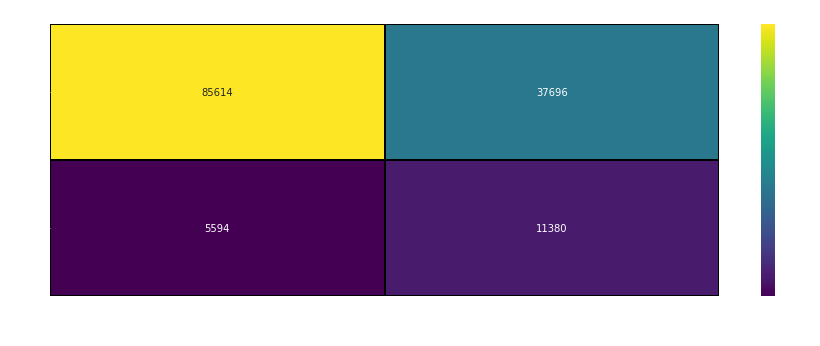

Resampled Balanced Bagging with LightGBM Classifier Cross Validation Score: 69.57%



Resampled Balanced Bagging with LightGBM Time:  60178.966713905334


In [34]:
#start
start_res_bbag_w_lgbm = time.time()

# Balanced Bagging Classifier
res_bbag_w_lgbm = BalancedBaggingClassifier(base_estimator=res_lgbm, max_features=X.shape[1], n_estimators=500, replacement=True, 
                                     sampling_strategy='majority', random_state=42)

res_bbag_w_lgbm.fit(X_train, y_train)
pred_res_bbag_w_lgbm = res_bbag_w_lgbm.predict(X_test)


# Creates a confusion matrix
res_bbag_w_lgbm_cm = confusion_matrix(y_test,pred_res_bbag_w_lgbm)

# Transform to df for easier plotting
res_bbag_w_lgbm_cm_df = pd.DataFrame(res_bbag_w_lgbm_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))

sns.heatmap(res_bbag_w_lgbm_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled Balanced Bagging with LightGBM Accuracy: {0:.2f}%'.format(accuracy_score(y_test,pred_res_bbag_w_lgbm )*100),
          fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()
print("Resampled Balanced Bagging with LightGBM Classifier Cross Validation Score: {:0.2f}%"
      .format(np.mean(cross_val_score(res_bbag_w_lgbm, X_train, y_train, cv=5)*100)))
print('\n')
#end
end_res_bbag_w_lgbm = time.time()
print("\nResampled Balanced Bagging with LightGBM Time: ",end_res_bbag_w_lgbm - start_res_bbag_w_lgbm)

In [75]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test,pred_res_bbag_w_lgbm).ravel()

accuracy = accuracy_score(y_test,pred_res_bbag_w_lgbm)*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy

print("Resampled Balanced Bagging Classifier with LightGBM Specificity Score: {0:.2f}%".format(specificity))
print("Resampled Balanced Bagging Classifier with LightGBM False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled Balanced Bagging Classifier with LightGBM Error Rate Score: {0:.2f}%".format(ers))

#Check scores
print("Resampled Balanced Bagging Classifier with LightGBM Accuracy Score: {:0.2f}%"
      .format(accuracy_score(res_y_test,pred_res_bbag_w_lgbm )*100))
print("Resampled Balanced Bagging Classifier with LightGBM F1 Score: {:0.2f}%"
      .format(f1_score(y_test, pred_res_bbag_w_lgbm,average="macro")*100))
print("Resampled Balanced Bagging Classifier with LightGBM Precision Scoreres_: {:0.2f}%"
      .format(precision_score(y_test, pred_res_bbag_w_lgbm, average="macro")*100))
print("Resampled Balanced Bagging Classifier with LightGBM Recall Score: {:0.2f}%"
      .format(recall_score(y_test, pred_res_bbag_w_lgbm, average="macro")*100))
print("Resampled Balanced Bagging Classifier with LightGBM Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(y_test, pred_res_bbag_w_lgbm)*100))

Resampled Balanced Bagging Classifier with LightGBM Specificity Score: 69.43%
Resampled Balanced Bagging Classifier with LightGBM False Positive Rate Score: 30.57%
Resampled Balanced Bagging Classifier with LightGBM Error Rate Score: 30.86%
Resampled Balanced Bagging Classifier with LightGBM Accuracy Score: 69.14%
Resampled Balanced Bagging Classifier with LightGBM F1 Score: 57.14%
Resampled Balanced Bagging Classifier with LightGBM Precision Scoreres_: 58.53%
Resampled Balanced Bagging Classifier with LightGBM Recall Score: 68.24%
Resampled Balanced Bagging Classifier with LightGBM Roc Auc Score: 68.24%


The results were better than the other learning algorithms but lower accuracy wise than the previous Balanced Bagging Algorithm. It also took longer than any other algorithm used. Taking all of that into consideration, I have decided that depending on what was the goal, either Balanced Bagging Classifier algorithm could be used. If I were more concerned with overall accuracy, the regular Balanced Bagging Classifier would be used. If I were more concerned with making sure "Serious" predictions were achieved, Balanced Bagging Classifier with LightGBM would be used.

In [77]:
#create list of b_bagging
b_bagging_data={'Learning Algorithm':['Balanced Bagging','Balanced Bagging w/ LGBM' ],
           'Accuracy  Score':[78.53,69.14], 'F1 Score ':[61.97,57.14],
           'Precision Score':[60.58,58.53],'Recall Score':[67.01,68.24],
           'Cross Validation Score':[78.47,69.57],'Specificity Score':[82.21,69.43],
           'Error Rate':[17.79,30.86],'False Positive Rate':[21.47,30.57],
           'Roc Auc Score':[67.01,68.24],'Time':[12142.18031,60178.96671],
           'Learning Library':['Imblearn', 'Imblearn']}
#create dataframe
b_bagging=pd.DataFrame(b_bagging_data) 

b_bagging.head(10)

Learning Algorithm  Accuracy  Score  F1 Score   Precision Score  \
0          Balanced Bagging            78.53      61.97            60.58   
1  Balanced Bagging w/ LGBM            69.14      57.14            58.53   

   Recall Score  Cross Validation Score  Specificity Score  Error Rate  \
0         67.01                   78.47              82.21       17.79   
1         68.24                   69.57              69.43       30.86   

   False Positive Rate  Roc Auc Score         Time Learning Library  
0                21.47          67.01  12142.18031         Imblearn  
1                30.57          68.24  60178.96671         Imblearn

In [78]:
#change time to minutes
b_bagging['Time in Minutes'] = round(b_bagging['Time']/60, 2)

#drop actual Time column
b_bagging=b_bagging.drop('Time',axis=1)

#rearrange columns
b_bagging = b_bagging[['Learning Algorithm', 'Accuracy  Score', 'F1 Score ', 'Precision Score',
                   'Recall Score', 'Cross Validation Score', 'Specificity Score', 'Error Rate',
                   'False Positive Rate','Roc Auc Score','Time in Minutes', 'Learning Library']]
b_bagging.set_index('Learning Algorithm', inplace=True)
b_bagging.head(10)

Accuracy  Score  F1 Score   Precision Score  \
Learning Algorithm                                                      
Balanced Bagging                    78.53      61.97            60.58   
Balanced Bagging w/ LGBM            69.14      57.14            58.53   

                          Recall Score  Cross Validation Score  \
Learning Algorithm                                               
Balanced Bagging                 67.01                   78.47   
Balanced Bagging w/ LGBM         68.24                   69.57   

                          Specificity Score  Error Rate  False Positive Rate  \
Learning Algorithm                                                             
Balanced Bagging                      82.21       17.79                21.47   
Balanced Bagging w/ LGBM              69.43       30.86                30.57   

                          Roc Auc Score  Time in Minutes Learning Library  
Learning Algorithm                                                         
Balanced Bagging                  67.01           202.37         Imblearn  
Balanced Bagging w/ LGBM          68.24          1002.98         Imblearn

In [ ]:
#csv file for Tableau 
b_bagging.to_csv('b_bagging_results.csv') 

If the cell below does not show, execute it to see Tableau table.

In [76]:
%%HTML
<div class='tableauPlaceholder' id='viz1572537010623' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ba&#47;BalancedBaggingComparisons&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='BalancedBaggingComparisons&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ba&#47;BalancedBaggingComparisons&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1572537010623');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Genesis L. Taylor<br>
[Github](https://github.com/GenTaylor/) | [Linkedin](https://linkedin.com/in/genesistaylor/) | [Tableau](https://public.tableau.com/profile/genesis.taylor#!/) | [genesisltaylor@gmail.com](mailto:genesisltaylor@gmail.com)
